# dataset1

In [1]:
import numpy as np
from minisom import MiniSom

In [2]:
import pandas as pd
X=pd.read_csv("fashion-mnist_test.csv")

In [3]:
X.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [5]:
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Assuming X_normalized is your input data
# Step 1: Ensure X_normalized is a DataFrame or array with rows representing individual samples and columns representing features
assert isinstance(X_normalized, (pd.DataFrame, np.ndarray)), "Input data must be a DataFrame or array"
assert len(X_normalized) > 0 and X_normalized.shape[1] > 0, "Input data must not be empty"

# Step 2: Convert DataFrame to array if necessary
if isinstance(X_normalized, pd.DataFrame):
    X_normalized = X_normalized.values

# Step 3: Initialize and fit MinMaxScaler to normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_normalized)

# Initialize SOM
som = MiniSom(x=10, y=10, input_len=X_normalized.shape[1], sigma=1.0, learning_rate=0.5)

# Randomly initialize weights
som.random_weights_init(X_normalized)

# Train the SOM
num_epochs = 10
som.train_random(X_normalized, num_epochs)


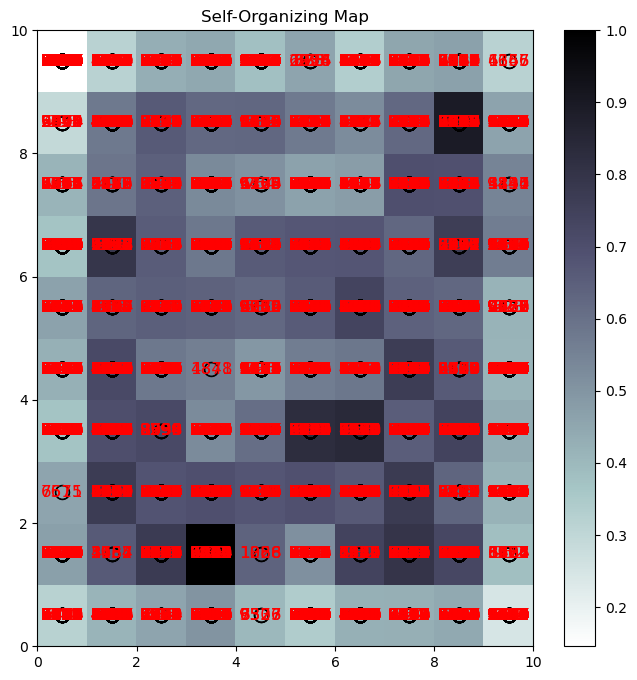

In [6]:
import matplotlib.pyplot as plt

# Plot the SOM
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map
plt.colorbar()

# Plot the data points on the SOM
for i, x in enumerate(X_normalized):
    winner = som.winner(x)  # Find the winning neuron for the input
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, 'o', markeredgecolor='k', markerfacecolor='None', markersize=10)
    plt.text(winner[0] + 0.5, winner[1] + 0.5, str(i), color='r', fontsize=12, ha='center', va='center')

plt.title('Self-Organizing Map')
plt.show()


# dataset 2

In [7]:
import numpy as np
from minisom import MiniSom

In [8]:
import pandas as pd
X=pd.read_csv("bank.csv")

In [9]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
from sklearn.preprocessing import LabelEncoder
# Assuming df is your DataFrame containing the dataset
# Initialize LabelEncoder
label_encoders = {}
# Iterate over each column
for column in X.columns:
    # Initialize LabelEncoder for the column
    label_encoders[column] = LabelEncoder()
    # Fit and transform the data in the column
    X[column] = label_encoders[column].fit_transform(X[column])


In [11]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [12]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X=s.fit_transform(X)

In [13]:
X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [14]:
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Assuming X_normalized is your input data
# Step 1: Ensure X_normalized is a DataFrame or array with rows representing individual samples and columns representing features
assert isinstance(X_normalized, (pd.DataFrame, np.ndarray)), "Input data must be a DataFrame or array"
assert len(X_normalized) > 0 and X_normalized.shape[1] > 0, "Input data must not be empty"

# Step 2: Convert DataFrame to array if necessary
if isinstance(X_normalized, pd.DataFrame):
    X_normalized = X_normalized.values

# Step 3: Initialize and fit MinMaxScaler to normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_normalized)

# Initialize SOM
som = MiniSom(x=10, y=10, input_len=X_normalized.shape[1], sigma=1.0, learning_rate=0.5)

# Randomly initialize weights
som.random_weights_init(X_normalized)

# Train the SOM
num_epochs = 10
som.train_random(X_normalized, num_epochs)


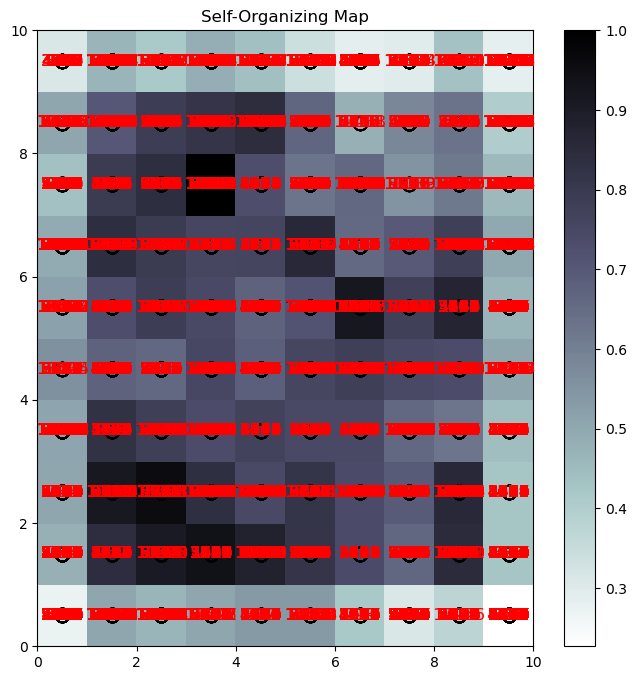

In [15]:
import matplotlib.pyplot as plt

# Plot the SOM
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map
plt.colorbar()

# Plot the data points on the SOM
for i, x in enumerate(X_normalized):
    winner = som.winner(x)  # Find the winning neuron for the input
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, 'o', markeredgecolor='k', markerfacecolor='None', markersize=10)
    plt.text(winner[0] + 0.5, winner[1] + 0.5, str(i), color='r', fontsize=12, ha='center', va='center')

plt.title('Self-Organizing Map')
plt.show()

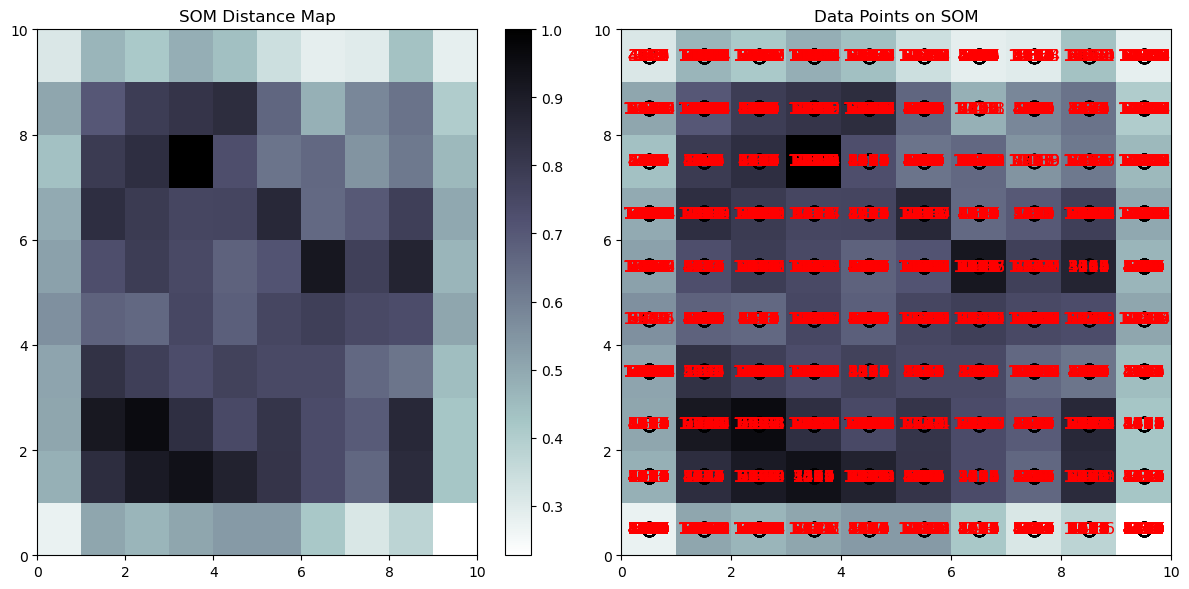

In [16]:
import matplotlib.pyplot as plt

# Plot the SOM grid
plt.figure(figsize=(12, 6))

# Plot the distance map
plt.subplot(1, 2, 1)
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.title('SOM Distance Map')

# Plot the data points on the SOM
plt.subplot(1, 2, 2)
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Replot the distance map to overlay with data points
for i, x in enumerate(X_normalized):
    winner = som.winner(x)  # Find the winning neuron for the input
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, 'o', markeredgecolor='k', markerfacecolor='None', markersize=10)
    plt.text(winner[0] + 0.5, winner[1] + 0.5, str(i), color='r', fontsize=12, ha='center', va='center')
plt.title('Data Points on SOM')

plt.tight_layout()
plt.show()


# Dataset

In [17]:
import pandas as pd
df=pd.read_csv("BostonHousing.csv")

In [18]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X=s.fit_transform(df)

In [20]:
X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [21]:
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Assuming X_normalized is your input data
# Step 1: Ensure X_normalized is a DataFrame or array with rows representing individual samples and columns representing features
assert isinstance(X_normalized, (pd.DataFrame, np.ndarray)), "Input data must be a DataFrame or array"
assert len(X_normalized) > 0 and X_normalized.shape[1] > 0, "Input data must not be empty"

# Step 2: Convert DataFrame to array if necessary
if isinstance(X_normalized, pd.DataFrame):
    X_normalized = X_normalized.values

# Step 3: Initialize and fit MinMaxScaler to normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_normalized)

# Initialize SOM
som = MiniSom(x=10, y=10, input_len=X_normalized.shape[1], sigma=1.0, learning_rate=0.5)

# Randomly initialize weights
som.random_weights_init(X_normalized)

# Train the SOM
num_epochs = 10
som.train_random(X_normalized, num_epochs)


C:\Users\gss\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:479: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\gss\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [22]:
pip install sompy

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install --upgrade --force-reinstall sompy


  Using cached sompy-0.1.1-py2.py3-none-any.whl
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: sompy
    Found existing installation: sompy 0.1.1
    Uninstalling sompy-0.1.1:
      Successfully uninstalled sompy-0.1.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.


In [26]:
from sklearn.preprocessing import MinMaxScaler
from sompy.sompy import SOMFactory

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Create and train the SOM
map_size = (10, 10)  # Size of the SOM grid
som = SOMFactory.build(X_normalized, map_size, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')
som.train(n_job=1, verbose=None, train_rough_len=2, train_finetune_len=5)

# Predict target variable using trained SOM
predicted_values = som.predict(X_normalized)

# # Evaluate the regression performance (e.g., using mean squared error)
mse = np.mean((predicted_values - y) ** 2)
print("Mean Squared Error:", mse)


ImportError: cannot import name 'SOM' from partially initialized module 'sompy' (most likely due to a circular import) (C:\Users\gss\anaconda3\Lib\site-packages\sompy\__init__.py)

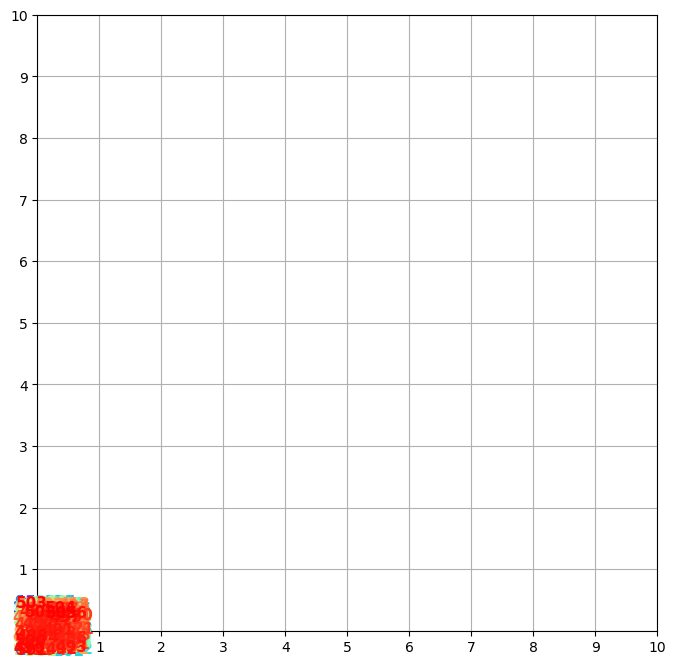

In [35]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
data = pd.read_csv("BostonHousing.csv")

# Convert DataFrame to NumPy array
data_array = data.values

# Normalize data
data_normalized = (data_array - np.min(data_array, axis=0)) / (np.max(data_array, axis=0) - np.min(data_array, axis=0))

# Define linear decay function
def linear_decay(learning_rate, t, max_iteration):
    return learning_rate * (1 - t / max_iteration)

# Define SOM parameters
som_shape = (10, 10)  # Grid shape of the SOM
input_len = data_normalized.shape[1]  # Number of features
sigma = 1.0  # Spread of the neighborhood function
learning_rate = 0.5  # Initial learning rate
decay_function = linear_decay  # Linear decay function

# Initialize SOM
som = MiniSom(som_shape[0], som_shape[1], input_len, sigma=sigma, learning_rate=learning_rate, decay_function=decay_function)

# Train SOM
som.train_batch(data_normalized, 1000)  # 1000 epochs

# Visualize SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data_normalized):
    winner = som.winner(x)
    plt.text(winner[0] + np.random.rand() * 0.8 - 0.4,  # jitter X coordinate for better visualization
             winner[1] + np.random.rand() * 0.8 - 0.4,  # jitter Y coordinate for better visualization
             str(i), color=plt.cm.rainbow(i / len(data_normalized)), fontdict={'weight': 'bold', 'size': 11})
plt.xticks(np.arange(som_shape[0] + 1))
plt.yticks(np.arange(som_shape[1] + 1))
plt.grid()
plt.xlim(0, som_shape[0])
plt.ylim(0, som_shape[1])
plt.show()
